# EDA on Walmart data analysis

In [3]:
#import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [4]:
w_data = pd.read_csv('C:/Users/HP/Desktop/Walmart Data Analysis and Forcasting.csv')

In [5]:
w_data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [6]:
#check any null values are there 

w_data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
w_data.shape

(6435, 8)

In [8]:
w_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
# Here if you observe 'date' is in some object dtype.now convert it into datetime dtype for further analysis

date = pd.to_datetime(w_data['Date'])

In [10]:
w_data['date'] = date

In [11]:
#Dropping 'Date' column which is in object form

walmart_data = w_data.drop(['Date'] , axis=1)

In [12]:
date_in_year = walmart_data['date'].dt.year

In [13]:
walmart_data['date_in_year'] = date_in_year

In [14]:
walmart_data.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
date             143
date_in_year       3
dtype: int64

<Figure size 1500x1000 with 0 Axes>

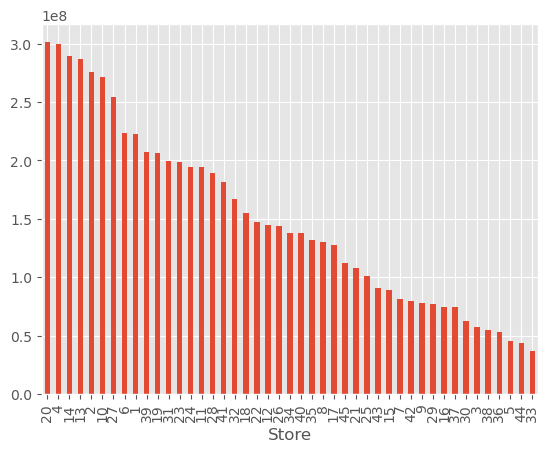

<Figure size 1500x1000 with 0 Axes>

In [16]:
#which store has the higest sales
plt.style.use('ggplot')
walmart_data.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending=False).plot.bar()
plt.figure(figsize=(15,10))

# Observation 

1. among all stores,20th store has the higest sales

<Figure size 1500x1000 with 0 Axes>

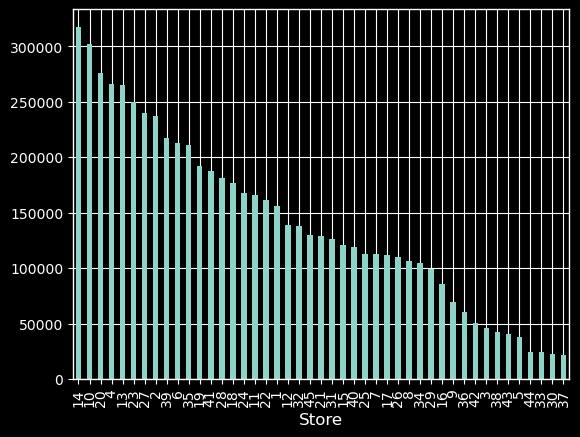

<Figure size 1500x1000 with 0 Axes>

In [17]:
#which store has the more sales vary
plt.style.use('dark_background')
walmart_data.groupby('Store').std()['Weekly_Sales'].sort_values(ascending=False).plot.bar()
plt.figure(figsize=(15,10))

# Observation

1. Store 14 has more sales vary

<AxesSubplot:xlabel='date_in_year'>

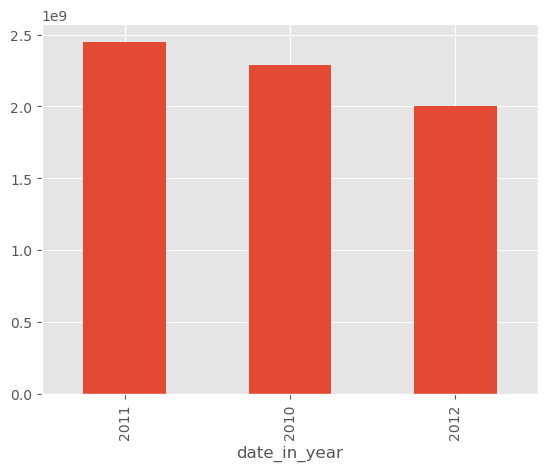

In [22]:
# In which year sales are more
plt.style.use('ggplot')
walmart_data.groupby('date_in_year').sum()['Weekly_Sales'].sort_values(ascending=False).plot.bar()

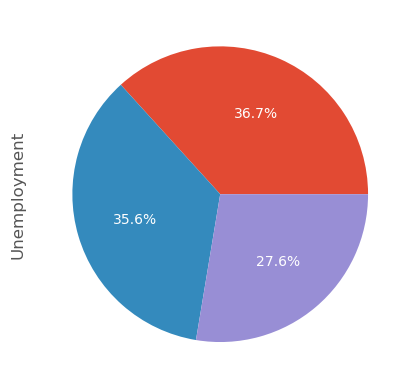

In [23]:
#In which year umemployement rate is more
w_unemploy = walmart_data.groupby('date_in_year').sum()['Unemployment'].sort_values(ascending=False).plot.pie(autopct='%0.1f%%')

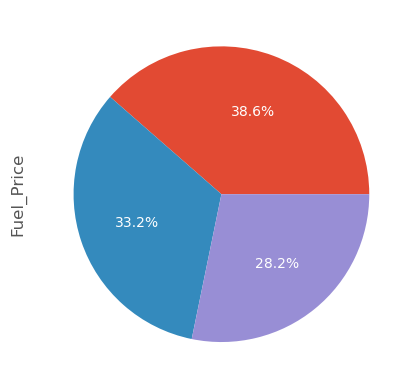

In [24]:
# In which year fuel prices are more
w_fuelprice = walmart_data.groupby('date_in_year').sum()['Fuel_Price'].sort_values(ascending=False).plot.pie(autopct='%0.1f%%')


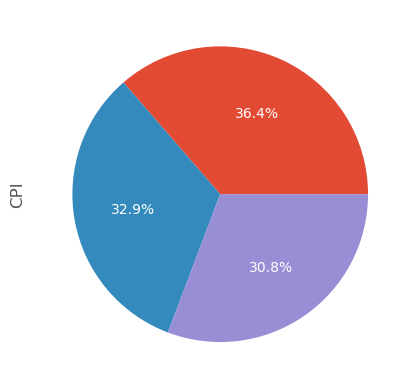

In [25]:
# In which year 'CPI' are more
w_cpi = walmart_data.groupby('date_in_year').sum()['CPI'].sort_values(ascending=False).plot.pie(autopct='%0.1f%%')

<AxesSubplot:xlabel='date_in_year,Holiday_Flag'>

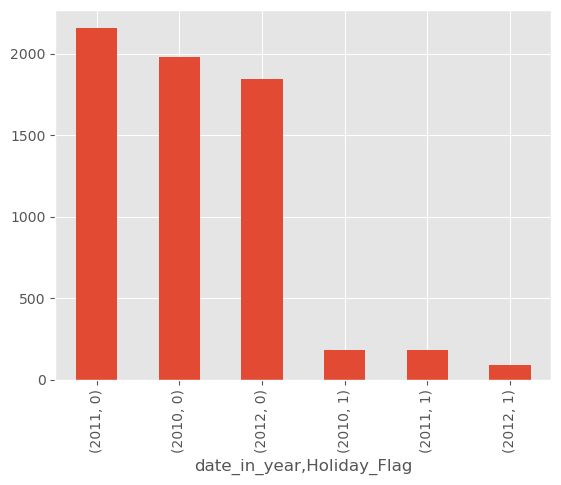

In [26]:
#which year holidays are more
walmart_data.groupby('date_in_year')['Holiday_Flag'].value_counts().sort_values(ascending=False).plot.bar()

In [27]:
#convert date into months

date_in_months = walmart_data['date'].dt.month

walmart_data['date_in_months'] = date_in_months

In [28]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store           6435 non-null   int64         
 1   Weekly_Sales    6435 non-null   float64       
 2   Holiday_Flag    6435 non-null   int64         
 3   Temperature     6435 non-null   float64       
 4   Fuel_Price      6435 non-null   float64       
 5   CPI             6435 non-null   float64       
 6   Unemployment    6435 non-null   float64       
 7   date            6435 non-null   datetime64[ns]
 8   date_in_year    6435 non-null   int64         
 9   date_in_months  6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 502.9 KB


# Observations

1. In 2011 sales are more
2. In 2011 year umemployement rate is more
3. In 2011 year fuel prices are more
4. In 2011 year 'CPI' are more

#The reason behind 2011 sales are more because the CPI(consumer price index) is more 
.CPI means goods related to food,clothing,transporting and many more were included in CPI.
.Therefore if CPI value is increasing goods prices also increasing 

In [29]:
w_2012_data = walmart_data[walmart_data['date_in_year']==2012]

In [30]:
w_2012_data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,date_in_year,date_in_months
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,2012-06-01,2012,6
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,2012-01-13,2012,1
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,2012-01-20,2012,1
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,2012-01-27,2012,1
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,2012-03-02,2012,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,2012,9
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012-05-10,2012,5
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012-12-10,2012,12
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,2012,10


Text(0.5, 1.0, 'Highest month sales in 2012')

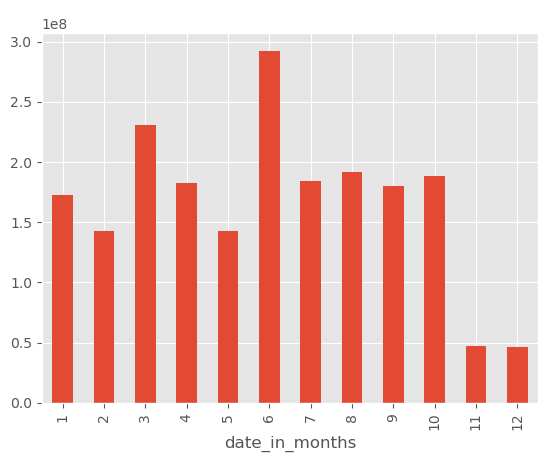

In [31]:
#In 2012 which month has more sales

w_2012_data.groupby('date_in_months').sum()['Weekly_Sales'].plot.bar()
plt.title('Highest month sales in 2012')

In [32]:
#finding quaterly sales in 2012

first_quarter_sales = w_2012_data[w_2012_data['date_in_months']<=3]

second_quarter_sales = w_2012_data[(w_2012_data['date_in_months']>3) & (w_2012_data['date_in_months']<=6)]

third_quarter_sales = w_2012_data[(w_2012_data['date_in_months']>6) & (w_2012_data['date_in_months']<=9)]

fourth_quarter_sales = w_2012_data[(w_2012_data['date_in_months']>6) & (w_2012_data['date_in_months']<=12)]


In [33]:
print('first_quarter_sales:',first_quarter_sales['Weekly_Sales'].sum())

print('second_quarter_sales:',second_quarter_sales['Weekly_Sales'].sum())

print('third_quarter_sales:',third_quarter_sales['Weekly_Sales'].sum())

print('fourth_quarter_sales:',fourth_quarter_sales['Weekly_Sales'].sum())

first_quarter_sales: 545789966.99
second_quarter_sales: 617214097.34
third_quarter_sales: 555995015.96
fourth_quarter_sales: 837128795.02


# Observation

fourth quarter sales has more sales compare to other quarter sales